In [2]:
#Data
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
data = pd.read_csv(r"C:\Users\tomlm\Downloads\population.csv")
print(f"Total Samples: {len(data)}")
print(data.head())

Total Samples: 121
  Population Identifier  Year    WorldPop
0      World   OWID_WRL  1900  1647405022
1      World   OWID_WRL  1901  1658785643
2      World   OWID_WRL  1902  1672564382
3      World   OWID_WRL  1903  1687012805
4      World   OWID_WRL  1904  1701647404


In [7]:
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

model = pm.auto_arima(data.WorldPop, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=3807.191, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=3802.729, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=3805.810, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=3804.131, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=3809.991, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0] intercept
Total fit time: 0.306 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  121
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1899.364
Date:                Sat, 03 Sep 2022   AIC                           3802.729
Time:                        07:25:01   BIC                           3808.287
Sample:                             0   HQIC                          3804.986
                                - 121                                       

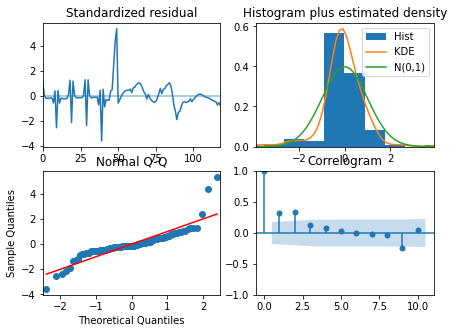

In [8]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

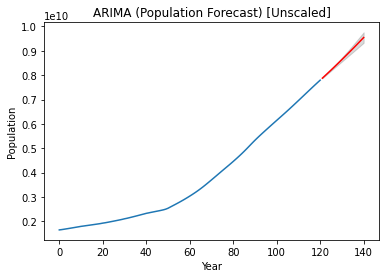

121    7.876717e+09
122    7.959223e+09
123    8.042317e+09
124    8.125999e+09
125    8.210269e+09
126    8.295126e+09
127    8.380571e+09
128    8.466604e+09
129    8.553225e+09
130    8.640434e+09
131    8.728230e+09
132    8.816615e+09
133    8.905587e+09
134    8.995147e+09
135    9.085294e+09
136    9.176030e+09
137    9.267353e+09
138    9.359264e+09
139    9.451763e+09
140    9.544850e+09
dtype: float64
[121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140]


In [11]:
# Forecast
n_periods = 20
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(data.WorldPop), len(data.WorldPop)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data.WorldPop)
plt.plot(fc_series, color='red')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.xlabel("Year")
plt.ylabel("Population")
plt.title("ARIMA (Population Forecast) [Unscaled]")

plt.show()

print(fc_series)
print(index_of_fc)



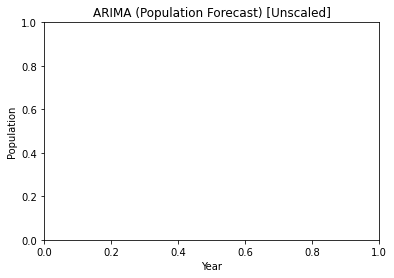

121    7.876717e+09
122    7.959223e+09
123    8.042317e+09
124    8.125999e+09
125    8.210269e+09
126    8.295126e+09
127    8.380571e+09
128    8.466604e+09
129    8.553225e+09
130    8.640434e+09
131    8.728230e+09
132    8.816615e+09
133    8.905587e+09
134    8.995147e+09
135    9.085294e+09
136    9.176030e+09
137    9.267353e+09
138    9.359264e+09
139    9.451763e+09
140    9.544850e+09
dtype: float64
[121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140]
